# Recommendation Engine / System

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
productos = pd.read_csv("Peliculas.csv", sep = ';', index_col=0)
productos

,Matrix,Alien,Toy_Story,Monsters_Inc,Titanic,Amelie
UserID,,,,,,
0,5,5,4,0,4,0
1,0,0,0,0,5,5
2,3,0,5,5,0,0
3,5,5,0,0,0,1
4,0,2,0,0,5,5
5,0,0,5,5,4,0
6,5,5,0,0,0,0


In [8]:
from scipy.linalg import svd

#calcula los componnentes principales usando svd

U, s, V_transp=svd(productos, full_matrices=False)

In [9]:
#matriz de vectores singulares
U

array([[-0.59725598,  0.15261091, -0.00221814, -0.66521948,  0.40223989,
        -0.12520545],
       [-0.22737091, -0.42897299,  0.46962994,  0.22139203,  0.37507102,
         0.58212488],
       [-0.33353678, -0.15076096, -0.57634343,  0.54777771,  0.40066828,
        -0.2056632 ],
       [-0.37598112,  0.43216044,  0.12639594,  0.34523735, -0.18002397,
        -0.09458394],
       [-0.29770279, -0.33800177,  0.51457647,  0.1446018 , -0.26196129,
        -0.61085684],
       [-0.34597423, -0.50182315, -0.40206725, -0.20027   , -0.58374914,
         0.23449179],
       [-0.361461  ,  0.46597092,  0.0696283 ,  0.16793336, -0.30853578,
         0.40752702]])

In [10]:
#matriz de observaciones
V_transp

array([[-0.53377025, -0.50558633, -0.40248412, -0.23631613, -0.44503149,
        -0.20875816],
       [ 0.47861185,  0.45631112, -0.26440191, -0.32525163, -0.52150407,
        -0.33918634],
       [-0.08059885,  0.21190964, -0.51974881, -0.51880787,  0.35038137,
         0.53528552],
       [ 0.25212368, -0.13448288, -0.26361514,  0.49607057, -0.46593589,
         0.6210256 ],
       [ 0.44480005, -0.55167849,  0.40042988, -0.52851628, -0.09265928,
         0.22258588],
       [ 0.46702293, -0.41087971, -0.51780527,  0.20925819,  0.42606498,
        -0.34586818]])

In [11]:
#Mostrar los valores singulare
s

array([14.37716096, 10.03198833,  9.4294125 ,  3.50260361,  1.73202669,
        0.68882817])

In [12]:
sigma_s=[]
for i in range(len(s)):
    a=(s[i]/(sum(s)))*100
    sigma_s.append(a)

sigma_s

[36.158024322309466,
 25.230077006121615,
 23.714621229647513,
 8.808917618276851,
 4.355982626055697,
 1.7323771975888653]

In [13]:
#Le indicamos la cantidad de valores singulares a tomar en cuenta
k=3

In [14]:
#Matriz de elementos
matriz_usuarios=U[:, :k]

In [15]:
matriz_usuarios_df=pd.DataFrame(np.round(matriz_usuarios,2))
matriz_usuarios_df

,0,1,2
0,-0.60,0.15,-0.00
1,-0.23,-0.43,0.47
2,-0.33,-0.15,-0.58
3,-0.38,0.43,0.13
4,-0.30,-0.34,0.51
5,-0.35,-0.50,-0.40
6,-0.36,0.47,0.07


In [16]:
#Matriz de Elementos
matriz_elementos=V_transp[:k, :]
matriz_elementos

array([[-0.53377025, -0.50558633, -0.40248412, -0.23631613, -0.44503149,
        -0.20875816],
       [ 0.47861185,  0.45631112, -0.26440191, -0.32525163, -0.52150407,
        -0.33918634],
       [-0.08059885,  0.21190964, -0.51974881, -0.51880787,  0.35038137,
         0.53528552]])

In [17]:
matriz_elementos_df=pd.DataFrame(np.round(matriz_elementos,2))
matriz_elementos_df

,0,1,2,3,4,5
0,-0.53,-0.51,-0.40,-0.24,-0.45,-0.21
1,0.48,0.46,-0.26,-0.33,-0.52,-0.34
2,-0.08,0.21,-0.52,-0.52,0.35,0.54


In [18]:
#calculamos los valores predichos de preferencia de los usuarios existentes para poderles recomendar mas peliculas

ratings_predichos=np.dot(matriz_usuarios,matriz_elementos)
ratings_predichos

array([[ 3.92017645e-01,  3.71132469e-01,  2.01188310e-01,
         9.26550675e-02,  1.85433311e-01,  7.17311821e-02],
       [-1.21799358e-01,  1.87295953e-02, -3.91551436e-02,
        -5.03921296e-02,  4.89447964e-01,  4.44353421e-01],
       [ 1.52328650e-01, -2.22949930e-02,  4.73658561e-01,
         4.26866877e-01,  2.51168245e-02, -1.87743713e-01],
       [ 3.97337276e-01,  4.14075047e-01, -2.86317583e-02,
        -1.17285693e-01, -1.37632071e-02, -4.35871424e-04],
       [-4.43410298e-02,  1.05324210e-01, -5.82615473e-02,
        -8.66787200e-02,  4.89054423e-01,  4.52238800e-01],
       [-2.31015951e-02, -1.39269567e-01,  4.80906112e-01,
         4.53573742e-01,  2.74795374e-01,  2.72157243e-02],
       [ 4.10344368e-01,  4.10132357e-01, -1.39105180e-02,
        -1.02262446e-01, -5.77477469e-02, -4.53220158e-02]])

In [19]:
ratings_predichos_df=pd.DataFrame(np.round(ratings_predichos,2),columns=productos.columns)
ratings_predichos_df

,Matrix,Alien,Toy_Story,Monsters_Inc,Titanic,Amelie
0,0.39,0.37,0.20,0.09,0.19,0.07
1,-0.12,0.02,-0.04,-0.05,0.49,0.44
2,0.15,-0.02,0.47,0.43,0.03,-0.19
3,0.40,0.41,-0.03,-0.12,-0.01,-0.00
4,-0.04,0.11,-0.06,-0.09,0.49,0.45
5,-0.02,-0.14,0.48,0.45,0.27,0.03
6,0.41,0.41,-0.01,-0.10,-0.06,-0.05


In [20]:
#Recomendamos para un usuario especifico

userID=1

prediccciones_usuario=ratings_predichos_df.loc[userID]
prediccciones_usuario

Matrix         -0.12
Alien           0.02
Toy_Story      -0.04
Monsters_Inc   -0.05
Titanic         0.49
Amelie          0.44
Name: 1, dtype: float64

In [21]:
#productos que compro el usuario
ratings_usuario= productos.loc[userID]
ratings_usuario

Matrix          0
Alien           0
Toy_Story       0
Monsters_Inc    0
Titanic         5
Amelie          5
Name: 1, dtype: int64

In [22]:
prod_comprados=list(ratings_usuario[ratings_usuario>0].index)
print("productos que ya compro", prod_comprados)

productos que ya compro ['Titanic', 'Amelie']


In [23]:
#obtenemos los productso restantes
prod_restantes=prediccciones_usuario.drop(prod_comprados)
prod_restantes

Matrix         -0.12
Alien           0.02
Toy_Story      -0.04
Monsters_Inc   -0.05
Name: 1, dtype: float64

In [24]:
#ordenamos en forma descendente los productos con base en el valor de su rating predicho y recomendamos tres peliculas

recomendaciones=prod_restantes.sort_values(ascending=False)[:3]
list(recomendaciones.index)

['Alien', 'Toy_Story', 'Monsters_Inc']

In [44]:
#ubicamos a los uausrios y a las peliculas en el plano bidimencional
coordenadas=pd.concat([matriz_usuarios_df.iloc[:,1:3], matriz_elementos_df.T.iloc[:, 1:3]])
coordenadas

,1,2
0,0.15,-0.00
1,-0.43,0.47
2,-0.15,-0.58
3,0.43,0.13
4,-0.34,0.51
5,-0.50,-0.40
6,0.47,0.07
0,0.48,-0.08
1,0.46,0.21
2,-0.26,-0.52


In [26]:
productos.index

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64', name='UserID')

In [27]:
usuarios_str=[]
for usuario in productos.index:
    u_str=str(usuario)
    usuarios_str.append(u_str)
print(usuarios_str)


['0', '1', '2', '3', '4', '5', '6']


In [41]:
nombres=pd.concat([pd.Series(usuarios_str), pd.Series(productos.columns)])
nombres

0               0
1               1
2               2
3               3
4               4
5               5
6               6
0          Matrix
1           Alien
2       Toy_Story
3    Monsters_Inc
4         Titanic
5          Amelie
dtype: object

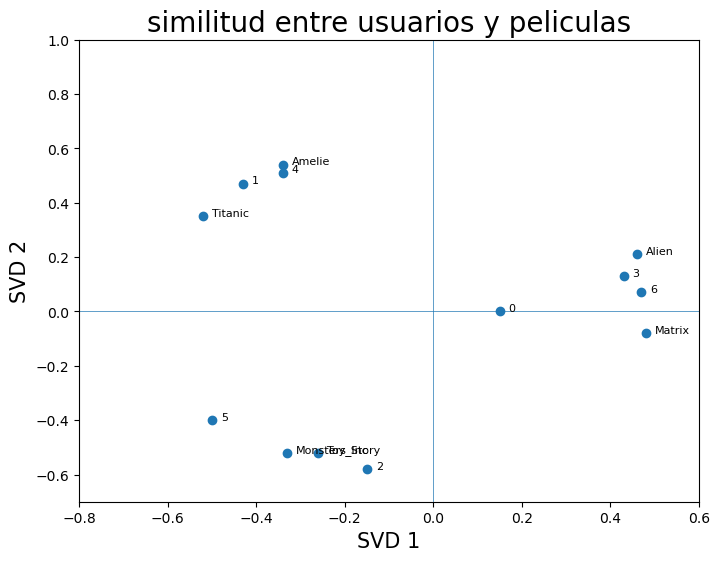

In [48]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel('SVD 1', fontsize=15)
ax.set_ylabel('SVD 2', fontsize=15)
ax.set_title('similitud entre usuarios y peliculas', fontsize=20)
ax.scatter(x=coordenadas.iloc[:,0], y=coordenadas.iloc[:,1])
ax.axhline(y=0, lw=0.5)
ax.axvline(x=0, lw=0.5)
ax.set_xlim(-0.8, 0.6)
ax.set_ylim(-0.7,1)

#colocamos las etiquetas acada uno de los puntos

for i, nombre in enumerate(nombres):
    ax.annotate(nombre, (coordenadas.iloc[i,0]+0.02, coordenadas.iloc[i,1]), fontsize=8)

plt.show()


In [46]:
#Calculamos la presicion del Sistema de Recomendacion con el error cuadratico medio

